In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

#### 제주 교통량 데이터

In [61]:
df = pd.read_csv("C:/Users/samsung/Desktop/datasets/jeju_traffic.tsv", sep = '\t')

In [62]:
df

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
0,TRAIN_0000000,20220623,목,17,1,106,지방도1112호선,0,0,60.0,...,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0
1,TRAIN_0000001,20220728,목,21,2,103,일반국도11호선,0,0,60.0,...,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0
2,TRAIN_0000002,20211010,일,7,2,103,일반국도16호선,0,0,80.0,...,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0
3,TRAIN_0000003,20220311,금,13,2,107,태평로,0,0,50.0,...,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0
4,TRAIN_0000004,20211005,화,8,2,103,일반국도12호선,0,0,80.0,...,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999994,TRAIN_0999994,20220214,월,11,1,106,지방도1112호선,0,0,60.0,...,0,송당입구,33.478605,126.783057,없음,덕천입구,33.494684,126.806104,없음,51.0
999995,TRAIN_0999995,20211019,화,16,2,107,중앙로,0,0,60.0,...,0,김약국,33.247607,126.561943,없음,한남투자,33.252712,126.561124,없음,16.0
999996,TRAIN_0999996,20211217,금,9,3,106,지방도1132호선,0,0,70.0,...,3,용흥교(동측),33.250624,126.489733,없음,강정교,33.250604,126.489259,없음,53.0
999997,TRAIN_0999997,20220118,화,4,2,103,일반국도16호선,0,0,80.0,...,0,상창교차로,33.280963,126.356788,없음,상창육교,33.280115,126.361832,없음,82.0


시계열 데이터 변환

In [65]:
df['base_date'] = df['base_date'].apply(lambda x : pd.to_datetime(str(x), format = '%Y-%m-%d'))

In [74]:
df

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
0,TRAIN_0000000,2022-06-23,목,17,1,106,지방도1112호선,0,0,60.0,...,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0
1,TRAIN_0000001,2022-07-28,목,21,2,103,일반국도11호선,0,0,60.0,...,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0
2,TRAIN_0000002,2021-10-10,일,7,2,103,일반국도16호선,0,0,80.0,...,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0
3,TRAIN_0000003,2022-03-11,금,13,2,107,태평로,0,0,50.0,...,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0
4,TRAIN_0000004,2021-10-05,화,8,2,103,일반국도12호선,0,0,80.0,...,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999994,TRAIN_0999994,2022-02-14,월,11,1,106,지방도1112호선,0,0,60.0,...,0,송당입구,33.478605,126.783057,없음,덕천입구,33.494684,126.806104,없음,51.0
999995,TRAIN_0999995,2021-10-19,화,16,2,107,중앙로,0,0,60.0,...,0,김약국,33.247607,126.561943,없음,한남투자,33.252712,126.561124,없음,16.0
999996,TRAIN_0999996,2021-12-17,금,9,3,106,지방도1132호선,0,0,70.0,...,3,용흥교(동측),33.250624,126.489733,없음,강정교,33.250604,126.489259,없음,53.0
999997,TRAIN_0999997,2022-01-18,화,4,2,103,일반국도16호선,0,0,80.0,...,0,상창교차로,33.280963,126.356788,없음,상창육교,33.280115,126.361832,없음,82.0


#### 제주 강수량 데이터

In [68]:
df2 = pd.read_csv("C:/Users/samsung/Desktop/datasets/jeju_weather.csv", encoding = 'cp949')

In [69]:
df2 = df2[7:]
df2.columns = ['date', 'region', 'precipitation']
df2 = df2.reset_index().drop('index', axis = 1)

In [70]:
df2

,date,region,precipitation
0,2021-09-01,제주,11.6
1,2021-09-02,제주,37.5
2,2021-09-03,제주,37.6
3,2021-09-04,제주,0
4,2021-09-05,제주,9.3
...,...,...,...
329,2022-07-27,제주,0
330,2022-07-28,제주,0
331,2022-07-29,제주,0
332,2022-07-30,제주,63.2


시계열 데이터 변환

In [73]:
df2['date'] = pd.to_datetime(df2['date'])

#### 데이터 병합

In [97]:
df_final = pd.merge(df, df2, left_on = ['base_date'], right_on = ['date'])

In [98]:
df_final

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target,date,region,precipitation
0,TRAIN_0000000,2022-06-23,목,17,1,106,지방도1112호선,0,0,60.0,...,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0,2022-06-23,제주,0.5
1,TRAIN_0000010,2022-06-23,목,11,1,103,일반국도99호선,0,0,60.0,...,126.491495,없음,노루생이삼거리,33.422672,126.492935,없음,47.0,2022-06-23,제주,0.5
2,TRAIN_0000030,2022-06-23,목,6,2,107,-,0,0,80.0,...,126.418443,없음,상귀교차로,33.473390,126.409129,없음,75.0,2022-06-23,제주,0.5
3,TRAIN_0000252,2022-06-23,목,21,2,103,일반국도95호선,0,0,80.0,...,126.433332,없음,제6광령교,33.443596,126.431817,없음,67.0,2022-06-23,제주,0.5
4,TRAIN_0000428,2022-06-23,목,22,2,103,일반국도12호선,0,0,50.0,...,126.405338,없음,하귀입구,33.485264,126.410896,없음,44.0,2022-06-23,제주,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999994,TRAIN_0991889,2022-03-15,화,0,2,106,중산간서로,0,0,70.0,...,126.369122,있음,노을과포도향기,33.451731,126.366077,없음,45.0,2022-03-15,제주,0
999995,TRAIN_0993164,2022-03-15,화,2,2,103,일반국도95호선,0,0,80.0,...,126.445750,없음,무수천사가로,33.460157,126.446843,없음,63.0,2022-03-15,제주,0
999996,TRAIN_0998157,2022-03-15,화,0,3,107,관덕로,0,0,60.0,...,126.538406,없음,광덕아파트,33.513333,126.542349,없음,33.0,2022-03-15,제주,0
999997,TRAIN_0999431,2022-03-15,화,1,3,103,일반국도12호선,0,0,60.0,...,126.553526,없음,중앙로타리,33.253200,126.561049,없음,27.0,2022-03-15,제주,0


In [99]:
# 날짜, 시간을 기준으로 오름차순 정렬
df_final = df_final.sort_values(['base_date', 'base_hour'], ascending = True).reset_index()

In [100]:
# 불필요하거나 중복되는 컬럼 제거
df_final = df_final.drop(['index', 'date', 'region'], axis = 1)
df_final

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target,precipitation
0,TRAIN_0002885,2021-09-01,수,0,3,103,일반국도11호선,0,0,70.0,...,인다마을,33.471061,126.545467,없음,염광아파트,33.469352,126.547314,없음,39.0,11.6
1,TRAIN_0005183,2021-09-01,수,0,1,107,-,0,0,30.0,...,삼다식품,33.429714,126.328707,없음,어도초등교,33.434581,126.324312,없음,40.0,11.6
2,TRAIN_0005280,2021-09-01,수,0,1,106,지방도1115호선,0,0,60.0,...,제4산록교,33.290116,126.489006,없음,제5산록교,33.291731,126.504396,없음,46.0,11.6
3,TRAIN_0008728,2021-09-01,수,0,2,103,일반국도12호선,0,0,80.0,...,종달교차로,33.496887,126.893155,없음,종달1교차로,33.492178,126.894049,있음,61.0,11.6
4,TRAIN_0016926,2021-09-01,수,0,2,106,번영로,0,0,70.0,...,와흘교차로,33.470925,126.645640,있음,회천교차로,33.475256,126.637239,있음,76.0,11.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999994,TRAIN_0962240,2022-07-31,일,22,3,106,지방도1132호선,0,0,70.0,...,도순교,33.250441,126.479773,없음,도순교,33.250576,126.478973,없음,55.0,43.9
999995,TRAIN_0975106,2022-07-31,일,22,2,107,새서귀로,0,0,60.0,...,시청입구1,33.249029,126.509864,없음,삼주연립101동,33.251045,126.510574,없음,24.0,43.9
999996,TRAIN_0991316,2022-07-31,일,22,3,107,관덕로,0,0,60.0,...,사라봉오거리,33.514205,126.538406,없음,광덕아파트,33.513333,126.542349,없음,34.0,43.9
999997,TRAIN_0993729,2022-07-31,일,22,2,107,새서귀로,0,0,60.0,...,난방시공협회,33.256449,126.511030,없음,시민공원,33.257130,126.510364,없음,28.0,43.9


#### 시각화

In [101]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999999 entries, 0 to 999998
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   id                     999999 non-null  object        
 1   base_date              999999 non-null  datetime64[ns]
 2   day_of_week            999999 non-null  object        
 3   base_hour              999999 non-null  int64         
 4   lane_count             999999 non-null  int64         
 5   road_rating            999999 non-null  int64         
 6   road_name              999999 non-null  object        
 7   multi_linked           999999 non-null  int64         
 8   connect_code           999999 non-null  int64         
 9   maximum_speed_limit    999999 non-null  float64       
 10  vehicle_restricted     999999 non-null  float64       
 11  weight_restricted      999999 non-null  float64       
 12  height_restricted      999999 non-null  floa

문자열(범주형) 데이터

- 변수의 분포 확인

C:\Users\samsung\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\samsung\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\samsung\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\samsung\anaconda

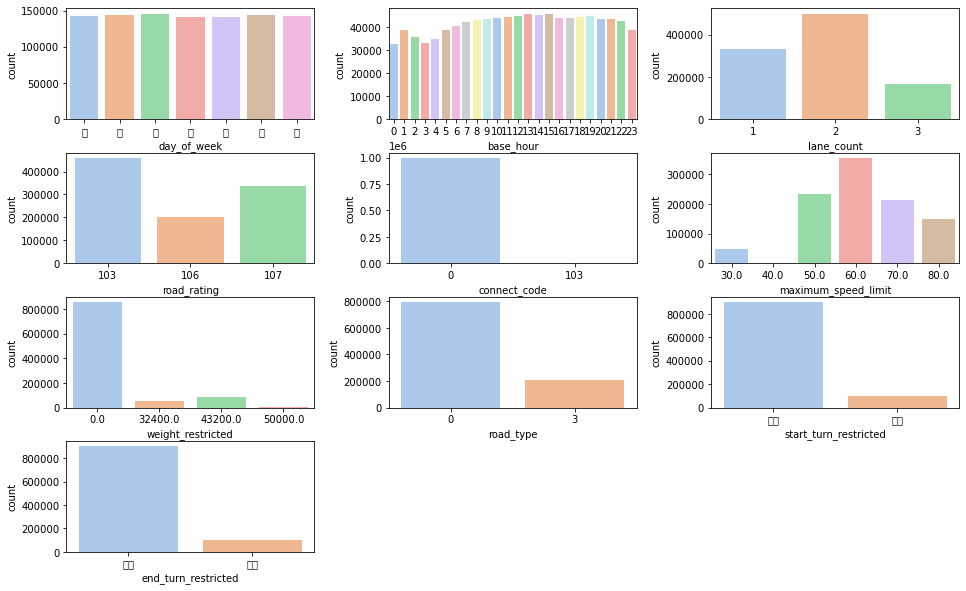

In [133]:
grid = gridspec.GridSpec(4,3)
plt.figure(figsize = (16,10))
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

features = ['day_of_week', 'base_hour', 'lane_count', 'road_rating', 'connect_code', 'maximum_speed_limit',
           'weight_restricted', 'road_type', 'start_turn_restricted','end_turn_restricted']

for idx, feature in enumerate(features) :
    ax = plt.subplot(grid[idx])
    
    sns.countplot(df[feature], palette = 'pastel')

- day, hour는 균등하게 분포
- lane_count는 2, road_rating은 103, speed_limit은 60, weight_restricted는 0이 가장 많이 분포
- connect_code, road_type, start/end_turn_restricted는 한 쪽의 비율이 압도적으로 높음

- road_name, start_node_name, end_node_name 

In [138]:
# 도로별 평균속도 
df_final.groupby('road_name')['target'].mean().sort_values()

road_name
삼무로          15.056803
삼봉로          16.909674
서사로          19.463600
신광로          19.515873
연동로          22.648192
               ...    
애조로          57.236572
지방도1117호선    58.858276
지방도97호선      60.476806
지방도1116호선    61.559718
일반국도95호선     70.483698
Name: target, Length: 61, dtype: float64

In [139]:
# 구간(시작지점-도착지점)별 평균속도
df_final.groupby(['start_node_name', 'end_node_name'])['target'].mean().sort_values()

start_node_name  end_node_name
성미가든             대흘교차로            11.578947
대흘교차로            성미가든             11.750000
삼무공원사거리          제주일보사거리          13.327897
제주시 삼양2동 1480-2  삼양검은모래해변입구교차로    14.441149
광령1교차로           무수천사가로           15.035682
                                    ...    
제2봉성교            봉성교차로            77.270485
서원               유수암교차로           78.116402
전표1교             동광2교차로           80.861210
동광1교차로           제1동광교            81.040529
제1동광교            전표1교             81.056059
Name: target, Length: 808, dtype: float64

수치형 데이터

In [158]:
# 수치형 데이터로 변환
df_final['precipitation'] = df_final['precipitation'].astype('float')

In [181]:
df_final.describe()

,base_hour,lane_count,road_rating,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,start_latitude,start_longitude,start_turn_restricted,end_latitude,end_longitude,end_turn_restricted,target,precipitation
count,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.0,999999.000000,999999.0,999999.000000,999999.000000,999999.000000,999999.0,999999.000000,999999.000000,999999.0,999999.000000,999999.000000
mean,11.928784,1.835453,104.957385,0.000515,0.259766,61.258891,0.0,5639.106439,0.0,0.616981,33.384357,126.521627,1.0,33.384355,126.521635,1.0,42.813737,3.896433
std,6.719341,0.687411,1.840266,0.022688,5.166089,12.133787,0.0,13973.110167,0.0,1.212550,0.101183,0.156464,0.0,0.101173,0.156442,0.0,15.954474,13.654325
min,0.000000,1.000000,103.000000,0.000000,0.000000,30.000000,0.0,0.000000,0.0,0.000000,33.243432,126.182617,1.0,33.243432,126.182617,1.0,1.000000,0.000000
25%,6.000000,1.000000,103.000000,0.000000,0.000000,50.000000,0.0,0.000000,0.0,0.000000,33.264217,126.422025,1.0,33.264586,126.422025,1.0,30.000000,0.000000
50%,12.000000,2.000000,106.000000,0.000000,0.000000,60.000000,0.0,0.000000,0.0,0.000000,33.412573,126.511195,1.0,33.412573,126.511195,1.0,43.000000,0.000000
75%,18.000000,2.000000,107.000000,0.000000,0.000000,70.000000,0.0,0.000000,0.0,0.000000,33.478037,126.583975,1.0,33.478037,126.583975,1.0,54.000000,0.900000
max,23.000000,3.000000,107.000000,1.000000,103.000000,80.000000,0.0,50000.000000,0.0,3.000000,33.556080,126.930941,1.0,33.556080,126.930941,1.0,112.000000,117.900000


In [182]:
df_final.corr()

,base_hour,lane_count,road_rating,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,start_latitude,start_longitude,start_turn_restricted,end_latitude,end_longitude,end_turn_restricted,target,precipitation
base_hour,1.000000,-0.029341,0.031156,0.004688,-0.002046,-0.037335,NaN,-0.002568,NaN,-0.007635,-0.022093,-0.011265,NaN,-0.022045,-0.011284,NaN,-0.159677,0.004366
lane_count,-0.029341,1.000000,-0.095849,-0.027588,-0.027960,0.383886,NaN,-0.177564,NaN,-0.051304,0.182735,-0.094958,NaN,0.182486,-0.094893,NaN,-0.143491,0.005082
road_rating,0.031156,-0.095849,1.000000,0.025195,-0.053483,-0.326830,NaN,-0.119375,NaN,-0.126171,-0.204204,0.006238,NaN,-0.204294,0.006238,NaN,-0.261327,-0.000586
multi_linked,0.004688,-0.027588,0.025195,1.000000,-0.001141,-0.021063,NaN,-0.009161,NaN,0.044611,-0.015512,0.027959,NaN,-0.015514,0.027962,NaN,-0.008589,-0.002574
connect_code,-0.002046,-0.027960,-0.053483,-0.001141,1.000000,-0.012973,NaN,-0.020293,NaN,-0.025585,0.036376,-0.045097,NaN,0.036894,-0.044248,NaN,0.047451,0.001796
maximum_speed_limit,-0.037335,0.383886,-0.326830,-0.021063,-0.012973,1.000000,NaN,0.085768,NaN,0.060208,0.253417,-0.033432,NaN,0.253313,-0.033370,NaN,0.426104,0.003253
vehicle_restricted,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weight_restricted,-0.002568,-0.177564,-0.119375,-0.009161,-0.020293,0.085768,NaN,1.000000,NaN,0.793132,-0.128512,0.034128,NaN,-0.128516,0.034124,NaN,0.295862,-0.001341
height_restricted,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
road_type,-0.007635,-0.051304,-0.126171,0.044611,-0.025585,0.060208,NaN,0.793132,NaN,1.000000,-0.044007,0.032548,NaN,-0.043997,0.032554,NaN,0.202609,-0.000147


- 변수의 분포 확인

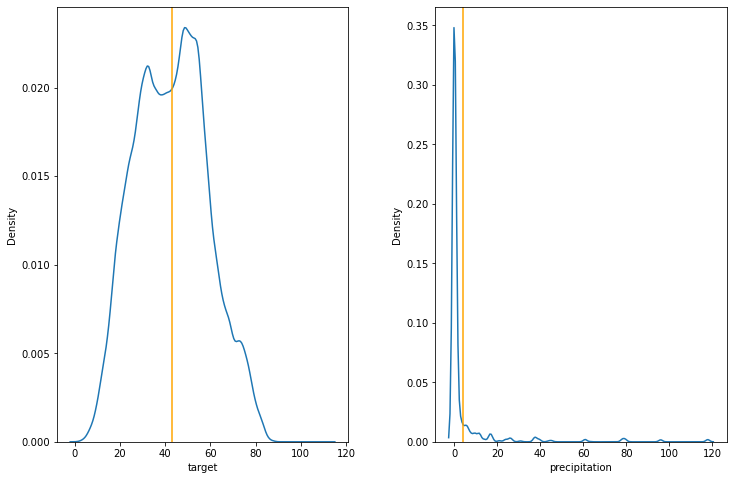

In [160]:
grid = gridspec.GridSpec(1,2)
plt.figure(figsize = (12,8))
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

features = ['target', 'precipitation']
for idx, feature in enumerate(features) :
    ax = plt.subplot(grid[idx])
    
    sns.kdeplot(data = df_final, x = feature).axvline(df_final[feature].mean(), color = 'orange') 

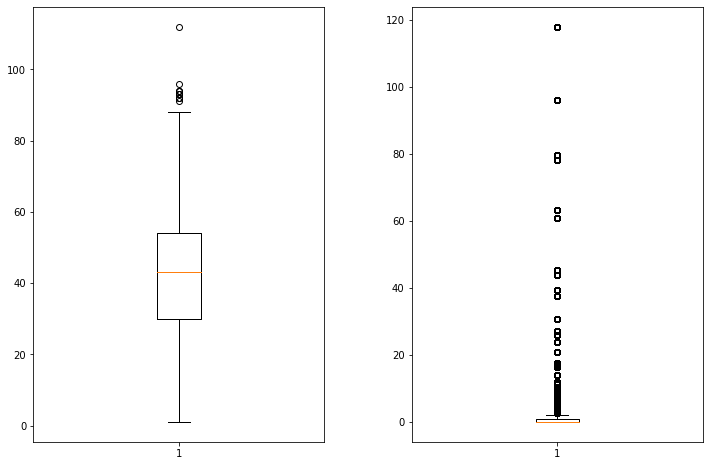

In [161]:
grid = gridspec.GridSpec(1,2)
plt.figure(figsize = (12,8))
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

features = ['target', 'precipitation']
for idx, feature in enumerate(features) :
    ax = plt.subplot(grid[idx])
    
    plt.boxplot(df_final[feature])

- target은 정규분포에 가까운 반면, precipitation은 20이하에 값이 극단적으로 치우쳐 있음

feature별 target의 분포

C:\Users\samsung\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\samsung\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47785 (\N{HANGUL SYLLABLE MOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\samsung\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\samsung\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53664 (\N{HANGUL SYLLABLE TO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\samsung\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\samsung\

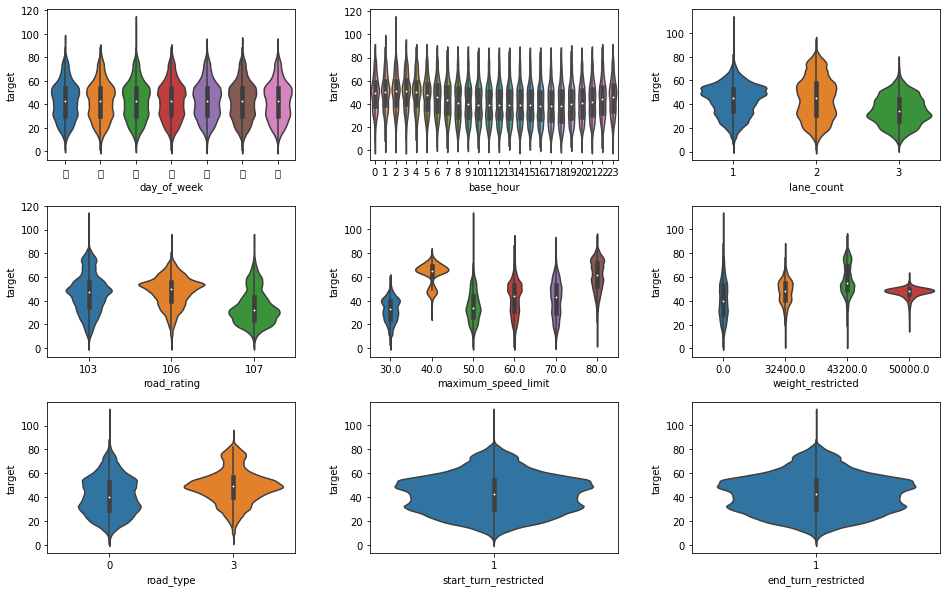

In [178]:
grid = gridspec.GridSpec(3,3)
plt.figure(figsize = (16,10))
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

features = ['day_of_week', 'base_hour', 'lane_count', 'road_rating', 'maximum_speed_limit',
           'weight_restricted', 'road_type', 'start_turn_restricted','end_turn_restricted']

for idx, feature in enumerate(features) :
    ax = plt.subplot(grid[idx])
    
    # pointplot을 사용해 변수의 각 그룹별 
    sns.violinplot(data = df_final, x = feature, y = 'target')

- day, hour는 target별로 큰 차이가 없음
- lane_count는 1인 경우 상대적으로 높은 값의 비중이 크며, 3인 경우 낮은 값의 비중이 작음
- road_rating은 107인 경우 낮은 값의 비중이 큼
- maximum_speed_limit은 40, 80인 경우 상대적으로 높은 값의 비중이 큼
- weight_restricted는 50000인 경우 값이 평균에 집중되어 있음
- road_type의 경우 0은 상대적으로 값이 고르게 분포되어 있는 반면, 3은 평균에 집중되어 있음
- start/end_turn_restricted는 0인 경우 target 역시 0임

<AxesSubplot:xlabel='target', ylabel='precipitation'>

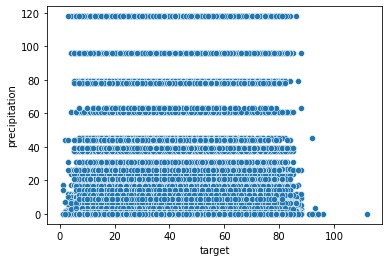

In [183]:
sns.scatterplot(data = df_final, x = 'target', y = 'precipitation') # 상관관계 없음